In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('Data_time.csv',index_col = 'date')

In [51]:
data

,transactionRevenue
date,
2017-01-01,993.01
2017-01-02,1027.60
2017-01-03,4574.74
2017-01-04,4777.14
2017-01-05,9097.97
...,...
2017-06-26,1917.98
2017-06-27,4016.31
2017-06-28,9042.57


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


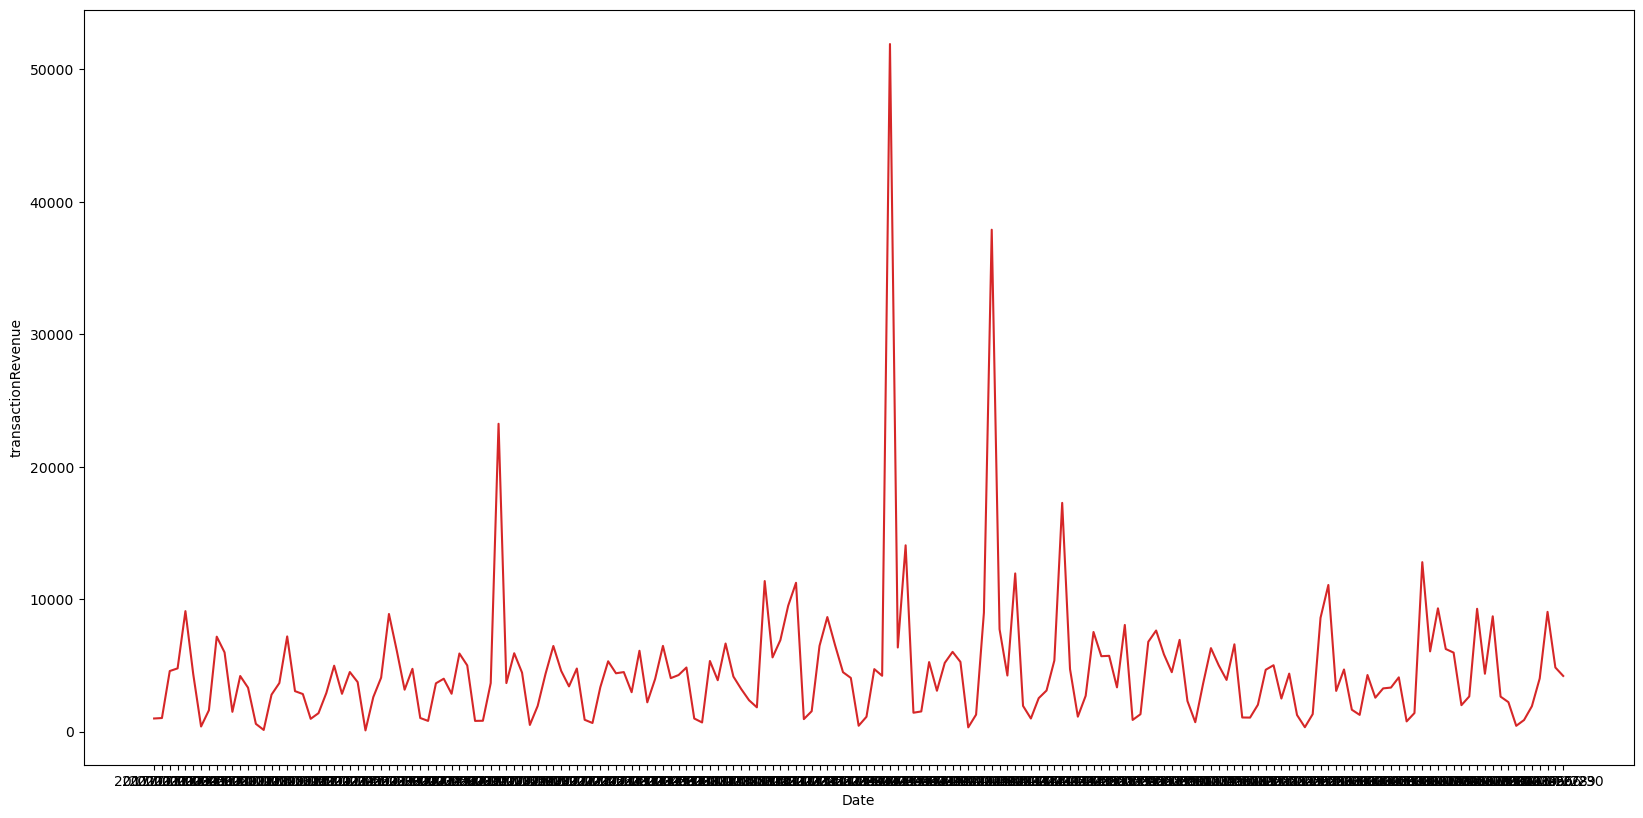

In [52]:
def plot_df(data, x, y, title="", xlabel='Date', ylabel='transactionRevenue', dpi=100):
    plt.figure(figsize=(20,10), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.transactionRevenue)

In [53]:
data['month'] = pd.DatetimeIndex(data.index).month
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data.index = pd.to_datetime(data.index)
data.head()

,transactionRevenue,month
date,,
2017-01-01,993.01,Jan
2017-01-02,1027.60,Jan
2017-01-03,4574.74,Jan
2017-01-04,4777.14,Jan
2017-01-05,9097.97,Jan


In [54]:
data.month.value_counts()

Jan    31
May    31
Mar    31
Apr    30
Jun    30
Feb    28
Name: month, dtype: int64

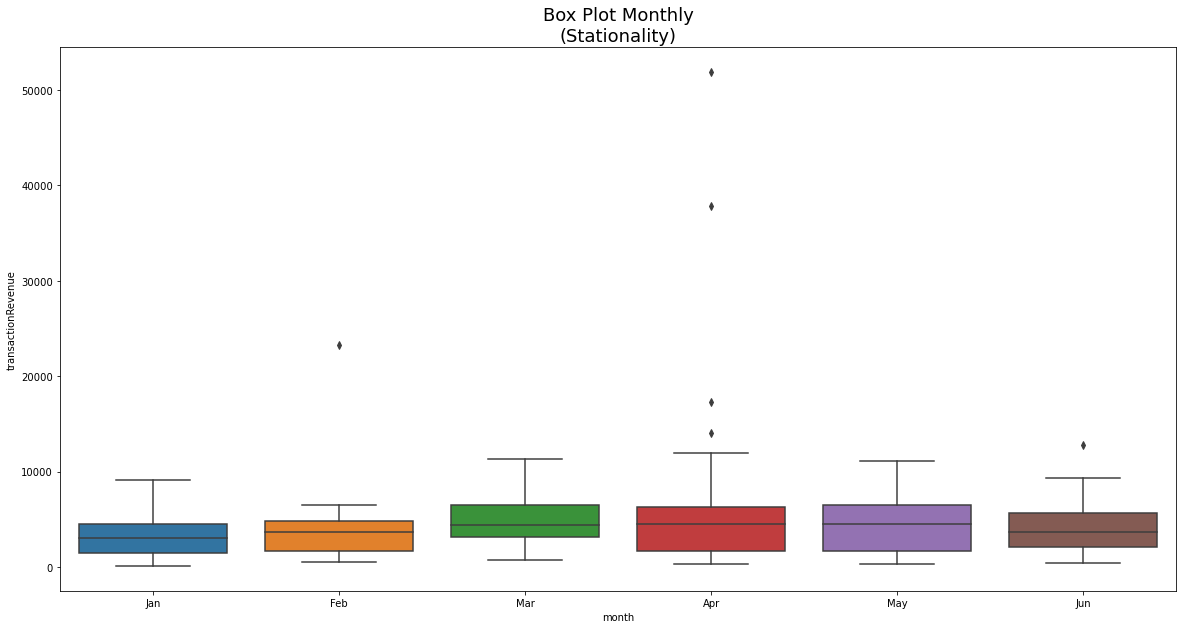

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(x='month', y='transactionRevenue', data=data)
plt.title('Box Plot Monthly\n(Stationality)', fontsize=18);

### Train and Test

In [56]:
data["timeIndex"] = pd.Series(np.arange(len(data['transactionRevenue'])), index=data.index)
dummies_month = pd.get_dummies(data['month'], drop_first=True)
dummies_month.head()
data = data.join(dummies_month)
data.sample(5)

,transactionRevenue,month,timeIndex,Feb,Jan,Jun,Mar,May
date,,,,,,,,
2017-04-05,51910.34,Apr,94,0,0,0,0,0
2017-03-27,6474.00,Mar,85,0,0,0,1,0
2017-02-07,3995.87,Feb,37,1,0,0,0,0
2017-05-20,1069.39,May,139,0,0,0,0,1
2017-01-03,4574.74,Jan,2,0,1,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=40, shuffle=False)

In [58]:
df_train.tail()

,transactionRevenue,month,timeIndex,Feb,Jan,Jun,Mar,May
date,,,,,,,,
2017-05-17,5001.99,May,136,0,0,0,0,1
2017-05-18,3904.75,May,137,0,0,0,0,1
2017-05-19,6592.03,May,138,0,0,0,0,1
2017-05-20,1069.39,May,139,0,0,0,0,1
2017-05-21,1060.11,May,140,0,0,0,0,1


In [59]:
df_test.head()

,transactionRevenue,month,timeIndex,Feb,Jan,Jun,Mar,May
date,,,,,,,,
2017-05-22,2029.05,May,141,0,0,0,0,1
2017-05-23,4671.20,May,142,0,0,0,0,1
2017-05-24,5014.32,May,143,0,0,0,0,1
2017-05-25,2498.75,May,144,0,0,0,0,1
2017-05-26,4380.77,May,145,0,0,0,0,1


In [60]:
df_train.shape

(141, 8)

In [61]:
df_test.shape

(40, 8)

In [62]:
def RMSE(predicted, actual):
    "Calculates RMSE"
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

### MEAN

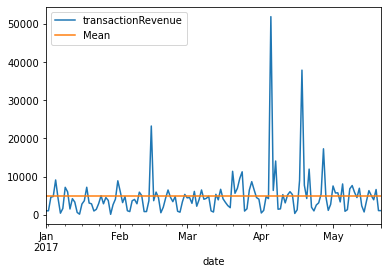

In [63]:
model_mean_pred = df_train['transactionRevenue'].mean()
df_train["Mean"] = model_mean_pred
df_test["Mean"] = model_mean_pred

df_train.plot(kind="line", y = ["transactionRevenue", "Mean"]);

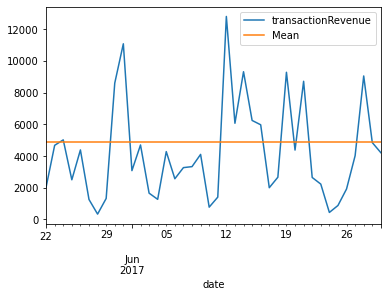

In [64]:
df_test.plot(kind="line", y = ["transactionRevenue", "Mean"]);

In [65]:
#Put RMSE score in Results dataframe
model_mean_RMSE = RMSE(df_test.Mean, df_test.transactionRevenue)
Results = pd.DataFrame(columns = ["Model", "RMSE"])
Results.loc[0, "Model"] = "Mean"
Results.loc[0, "RMSE"] = model_mean_RMSE

### Lineal Trend

In [66]:
import statsmodels.formula.api as smf
model_quadratic = smf.ols('transactionRevenue ~ timeIndex', data = df_train).fit()
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     transactionRevenue   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.103
Date:                Wed, 26 May 2021   Prob (F-statistic):             0.0804
Time:                        21:12:15   Log-Likelihood:                -1421.9
No. Observations:                 141   AIC:                             2848.
Df Residuals:                     139   BIC:                             2854.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3404.5969    978.486      3.479      0.001    1469.957    5339.237
timeIndex     21.2855     12.084      1.761      0.080      -2.607      45.178
==============================================================================
Omnibus:                      185.648   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7472.609
Skew:                           5.147   Prob(JB):                         0.00
Kurtosis:                      37.147   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
df_train["linearTrend"] = model_quadratic.predict(df_train[["timeIndex"
                                                      ]])

df_test["linearTrend"] = model_quadratic.predict(df_test[["timeIndex"
                                                      ]])

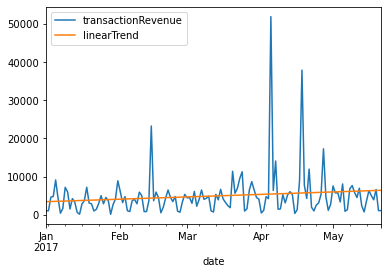

In [68]:
df_train.plot(kind = "line", y = ["transactionRevenue","linearTrend"]);

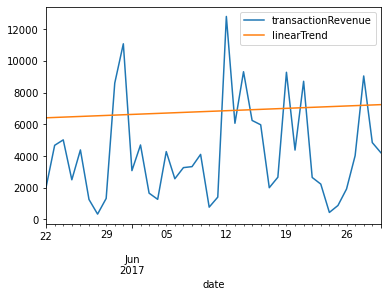

In [69]:
df_test.plot(kind = "line", y = ["transactionRevenue", "linearTrend"]);

In [70]:
Results.loc[1, "Model"] = "linearTrend"
Results.loc[1, "RMSE"] = RMSE(df_test.linearTrend, df_test.transactionRevenue)

### Linear Trend + Months

In [71]:
model_log_est = smf.ols('timeIndex ~  Feb + Jan + Jun + Mar + May',\
                          data = df_train).fit()
model_log_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              timeIndex   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     776.0
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.52e-92
Time:                        21:12:15   Log-Likelihood:                -499.12
No. Observations:                 141   AIC:                             1008.
Df Residuals:                     136   BIC:                             1023.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.5000      1.550     67.411      0.000     101.434     107.566
Feb          -60.0000      2.231    -26.893      0.000     -64.412     -55.588
Jan          -89.5000      2.175    -41.158      0.000     -93.800     -85.200
Jun        -4.632e-15   1.69e-16    -27.357      0.000   -4.97e-15    -4.3e-15
Mar          -30.5000      2.175    -14.026      0.000     -34.800     -26.200
May           25.5000      2.416     10.556      0.000      20.723      30.277
==============================================================================
Omnibus:                       37.993   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.388
Skew:                           0.000   Prob(JB):                       0.0249
Kurtosis:                       1.879   Cond. No.                     4.99e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.6e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
df_train['model_lin_est'] = model_log_est.predict(df_train[["Feb", "Jan",\
                                                "Jun", "Mar", "May",]])


df_test['model_lin_est'] = model_log_est.predict(df_test[["Feb", "Jan",\
                                                "Jun", "Mar", "May",]])

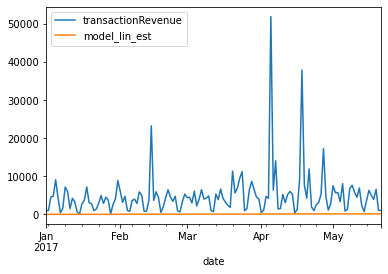

In [73]:
df_train.plot(kind = "line", y = ['transactionRevenue', 'model_lin_est']);

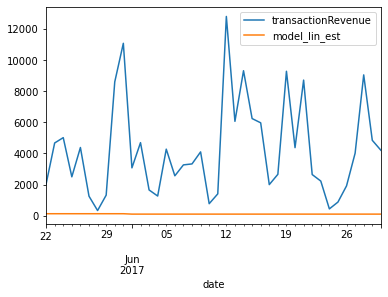

In [74]:
df_test.plot(kind = "line", y = ['transactionRevenue', 'model_lin_est']);

In [75]:
Results.loc[2, "Model"] = "linear+months"
Results.loc[2, "RMSE"] = RMSE(df_test.model_lin_est, df_test.transactionRevenue)

#### AdFuller


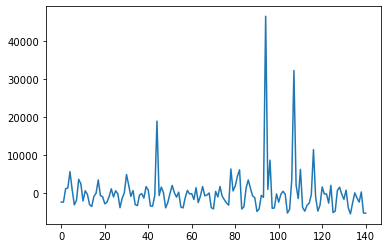

In [76]:
res_model = df_train['transactionRevenue'] - df_train['linearTrend']

plt.plot(df_train.timeIndex, res_model, '-');

In [77]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(res_model)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Critic Value %s: %.2f' % (key,value))

ADF Statistic: -1.582822
p-value: 0.492217
Critic Value 1%: -3.48
Critic Value 5%: -2.88
Critic Value 10%: -2.58


#### Prophet

In [78]:
from  fbprophet import Prophet

In [79]:
data_prophet_train = pd.DataFrame(df_train.index,df_train.transactionRevenue)

In [80]:
data_prophet_train['y'] = data_prophet_train.index

In [81]:
data_prophet_train.rename(columns = {'date':'ds'},inplace = True)

In [82]:
df_prophet_test = pd.DataFrame(df_test.index,df_test.transactionRevenue)

In [83]:
df_prophet_test['y'] = df_prophet_test.index

In [84]:
df_prophet_test.rename(columns = {'date':'ds'},inplace = True)

In [85]:
model = Prophet(daily_seasonality=True)

In [86]:
model.fit(data_prophet_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [87]:
forecast = model.predict(df_prophet_test)

In [88]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         yhat   yhat_lower    yhat_upper
0 2017-05-22  6573.460933   775.345901  13301.475801
1 2017-05-23  9600.745093  2823.575395  16478.963910
2 2017-05-24  9059.934257  2104.816730  15627.484951
3 2017-05-25  7202.197890   766.841789  13657.874758
4 2017-05-26  7473.437187   560.962576  14129.256197


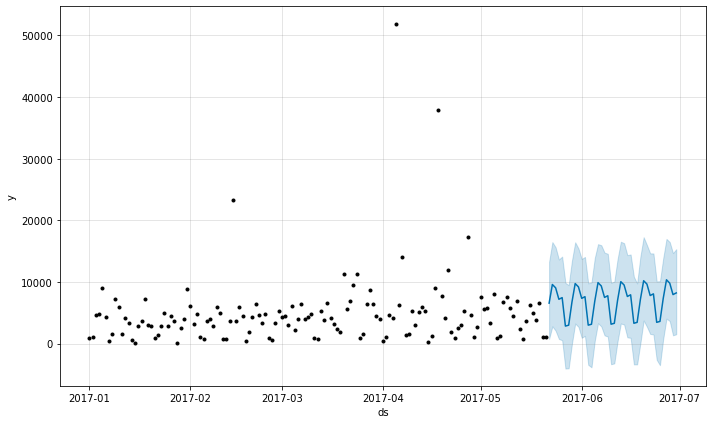

In [89]:
model.plot(forecast)
plt.show()

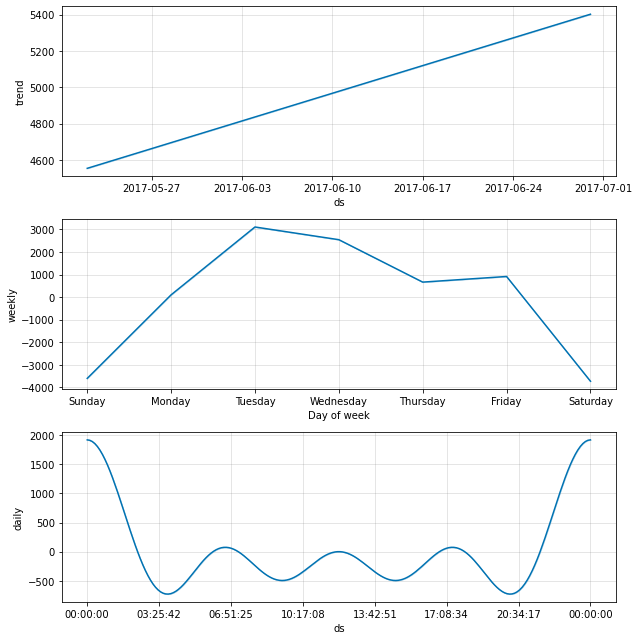

In [90]:
fig2 = model.plot_components(forecast)

In [91]:
df_prophet_test.reset_index(inplace = True)
Results.loc[3, "Model"] = "prophet"
Results.loc[3, "RMSE"] = RMSE(forecast.yhat, df_prophet_test.y)

In [92]:
#out of sampel forecast 6 months

In [245]:
future = model.make_future_dataframe(periods=185)
future.tail()

,ds
321,2017-11-18
322,2017-11-19
323,2017-11-20
324,2017-11-21
325,2017-11-22


In [246]:
future_forecast = model.predict(future)
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
321,2017-11-18,6662.956602,-239.390835,13069.173560
322,2017-11-19,6810.244883,-306.777653,13493.221065
323,2017-11-20,10532.984111,4020.111344,17538.317794
324,2017-11-21,13560.268271,6546.465710,20129.628561
325,2017-11-22,13019.457435,6140.357114,19237.855216


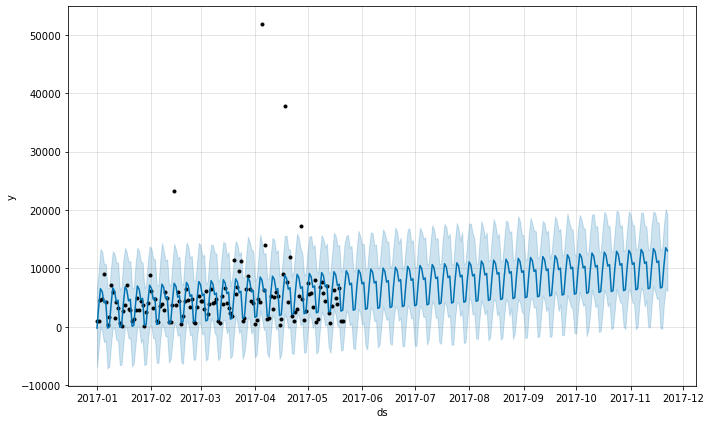

In [247]:
fig1 = model.plot(future_forecast)

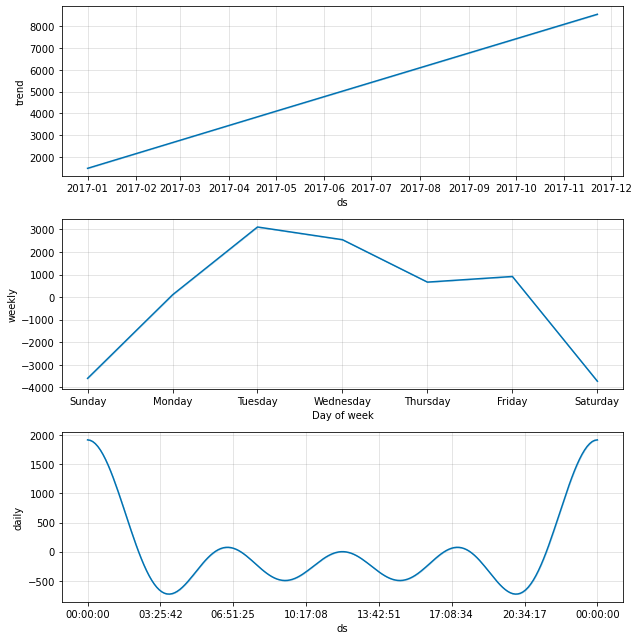

In [248]:
fig2 = model.plot_components(future_forecast)

In [100]:
import pickle
with open('model_prophet.pkl', 'wb') as f_model_prophet:
    pickle.dump(model,  f_model_prophet)